In [2]:
import folium
from folium import plugins
import pandas as pd
from folium.plugins import AntPath
from IPython.display import display
from ipywidgets import widgets  # Import the widgets module

import ipywidgets
import os
import json

# from IPython.display import display, HTML

# display(HTML("<style>.container { width:100% !important; }</style>"))


---
## Intitialize Map
---


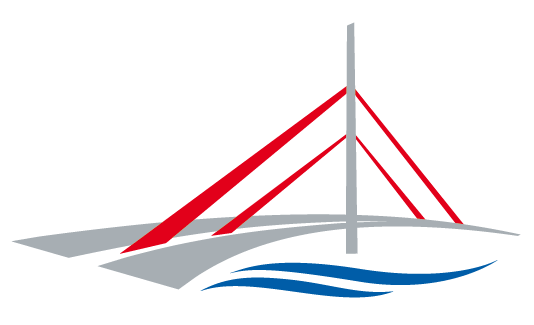
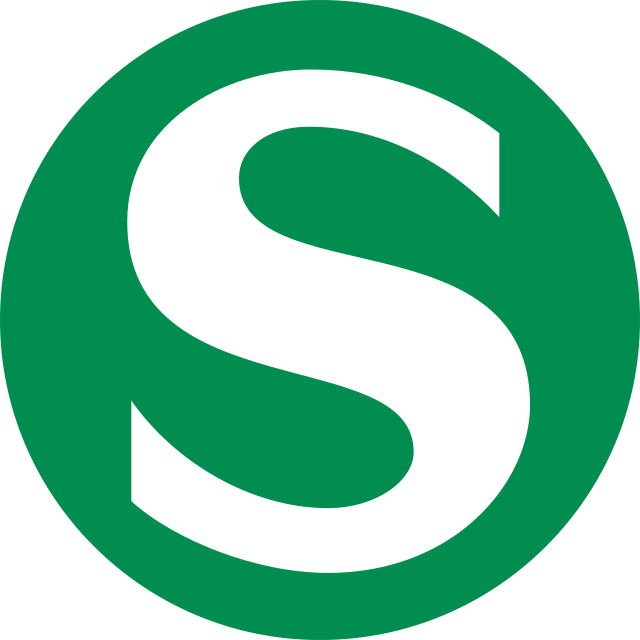
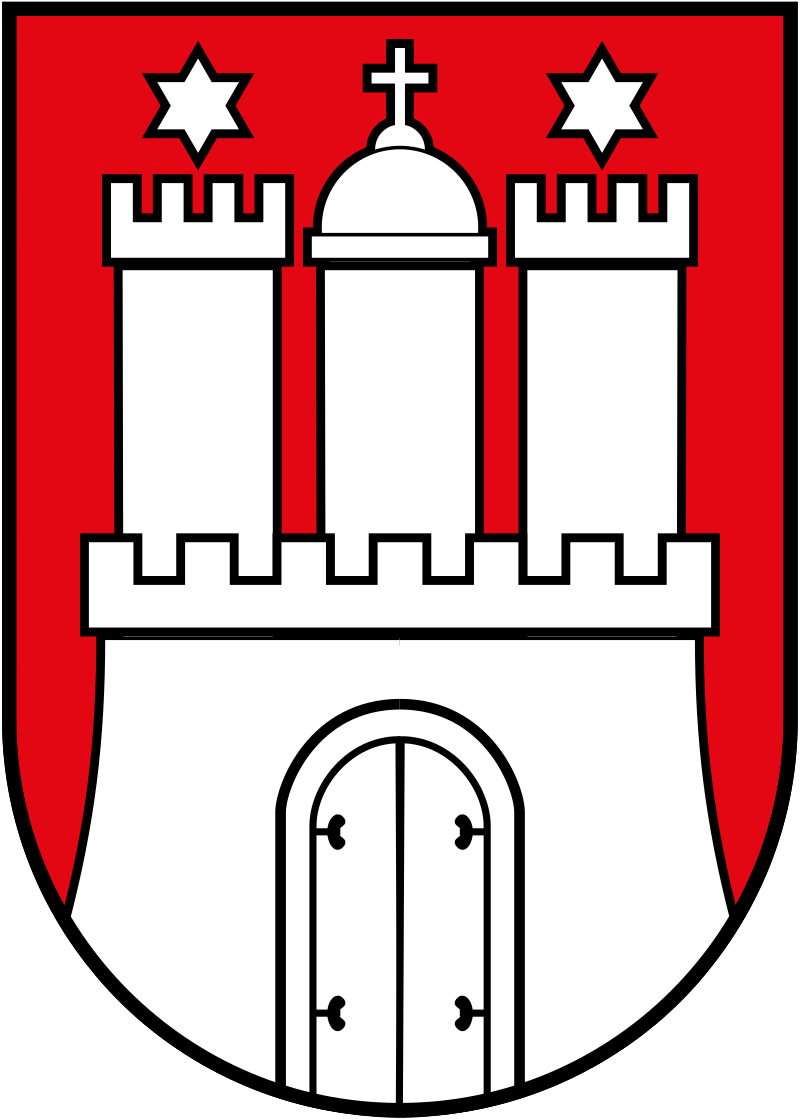

In [6]:
# the latitude and Longitude coordinates
Digilab_location =  (53.544390, 10.023626)
map = folium.Map(location = Digilab_location, zoom_start = 17,tiles="Cartodb Positron") # max zoom: 18



# LSBG
lsbg_icon_image = 'lsbg-logo.png'
digilab_loc = 'digilab.geojson'

lsbg_icon = folium.CustomIcon(
    lsbg_icon_image,
    icon_size=(100, 80),
)
folium.Marker(
    location=[
          53.54467217628269,10.023347869684045],
    tooltip="XLab / DigiLab",
    icon=lsbg_icon
).add_to(map)

folium.GeoJson(
    digilab_loc,
    color="blue",
    weight=2.5,
    fill_color="orange",
    fill_opacity=0.5,
    fill=True,
    tooltip="XLab / DigiLab",
).add_to(map)



# Hammerbrook 
hammerbrook_icon_image = 'S-Bahn-Logo.png'
hammerbrook_loc = 'hammerbrook.geojson'
sbahn_icon = folium.CustomIcon(
    hammerbrook_icon_image,
    icon_size=(30, 30),
)
folium.Marker(
    location=[ 53.54649247517253, 10.023729682148968],
    tooltip="Hammerbrook Sbahn Station",
    icon=sbahn_icon
).add_to(map)

folium.GeoJson(
    hammerbrook_loc,
    color="blue",
    weight=2.5,
    fill_color="orange",
    fill_opacity=0.5,
    fill=True,
    tooltip="Hammerbrook Sbahn Station",
).add_to(map)

# HBF 
hbf_icon_image = 'Hamburg_logo.png'
hbf_loc = 'hbf.geojson'
sbahn_icon = folium.CustomIcon(
    hbf_icon_image,
    icon_size=(30, 30),
)
folium.Marker(
    location=[53.552869259036214,10.006784628213978],
    tooltip="Hamburg Central Station",
    icon=sbahn_icon
).add_to(map)

folium.GeoJson(
    hbf_loc,
    color="blue",
    weight=2.5,
    fill_color="orange",
    fill_opacity=0.5,
    fill=True,
    tooltip="Hamburg Central Station",
).add_to(map)

# Add path
# hammerbrook
hammerbrook_path_json = open('path_hammerbrook.json')
hammerbrook_antpath_coords = json.load(hammerbrook_path_json)
antpath = AntPath(hammerbrook_antpath_coords, reverse = 'True',delay=1000, dash_array=[20, 30],pulse_color='red',weight=8, tooltip=' << Way to DigiLab >>').add_to(map)


# hbf
hbf_path_json = open('path_hbf.json')
hbf_antpath_coords = json.load(hbf_path_json)
antpath = AntPath(hbf_antpath_coords, delay=1000, dash_array=[20, 30],pulse_color='black',weight=8, tooltip=' << Way to DigiLab >>').add_to(map)


map

In [90]:
# add loaction layers on map 

import json
import pandas as pd
# testGeoJson = '/Users/nizam/Downloads/way-to-digilab.geojson'
testGeoJson = '/Users/nizam/Documents/navigation_proj/outdoor-navigation/path_hmmerbrook.geojson'

def switchPosition(coordinate):
  temp = coordinate[0]
  coordinate[0] = coordinate[1]
  coordinate[1] = temp
  return coordinate

In [ ]:
with open(testGeoJson) as f:
  testWay = json.load(f)

for feature in testWay['features']:
    path = feature['geometry']['coordinates']
    print(path)
finalPath = list(map(switchPosition,path))
print(type(finalPath))
# convert into json
# file name is mydata
with open("path_hammerbrook.json", "w") as final:
    json.dump(finalPath, final)

---
## Display geojson Outline
---
geojson drawing tool: http://geojson.io/